# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak 
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan 
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

In [19]:
# Import library di sini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [20]:
data = pd.read_csv("diabetes.csv")

# Encoding awal untuk data kategorikal ke dalam numerikal
data = pd.get_dummies(data, columns=['Sex'])
data['Diabetes'] = data['Diabetes'].replace({True: 1, False: 0})
data['Sex_M'] = data['Sex_M'].replace({True: 1, False: 0})
data['Sex_F'] = data['Sex_F'].replace({True: 1, False: 0})

C:\Users\Jason Rivalino\AppData\Local\Temp\ipykernel_19860\2799195438.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diabetes'] = data['Diabetes'].replace({True: 1, False: 0})
C:\Users\Jason Rivalino\AppData\Local\Temp\ipykernel_19860\2799195438.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex_M'] = data['Sex_M'].replace({True: 1, False: 0})
C:\Users\Jason Rivalino\AppData\Local\Temp\ipykernel_19860\2799195438.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [21]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen,
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 25 April 2023, pukul 12.00 WIB
- _Deliverable_ poin 2: Senin, 25 April 2023, pukul 21.00 WIB
- _Deliverable_ poin 3: Senin, 25 April 2023, pukul 21.00 WIB

---
---
---

### Jawaban Nomor 1: Baseline Logistic Regression

Hasil akurasi dari model data adalah:  0.8638155301537249
Hasil precision dari model data adalah:  0.5461956521739131
Hasil recall dari model data adalah:  0.1419491525423729
Hasil f1 dari model data adalah:  0.22533632286995517


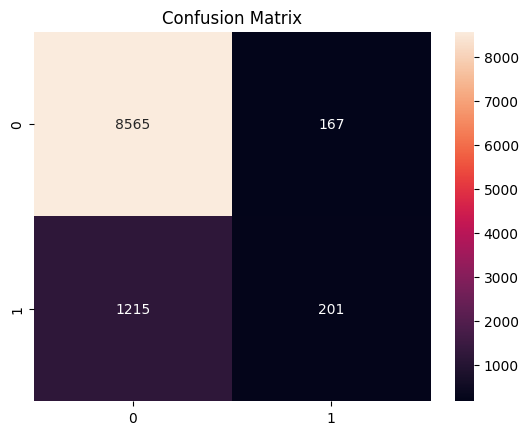

In [22]:
# Baseline dengan Logistic Regression
model = LogisticRegression(max_iter=1000)
fitting = model.fit(X_train, y_train)
predict = fitting.predict(X_test)

# Evaluasi model (accuracy, precision, recall, f1)
print("Hasil akurasi dari model data adalah: ", accuracy_score(y_test, predict))
print("Hasil precision dari model data adalah: ", precision_score(y_test, predict))
print("Hasil recall dari model data adalah: ", recall_score(y_test, predict))
print("Hasil f1 dari model data adalah: ", f1_score(y_test, predict))

# Membuat confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

---

### Jawaban Nomor 2: Analisis Duplicate Value, Missing Value, Outlier, dan Balance Of Data

#### Analisis Duplicate Value

In [23]:
# Analisis Duplicate Value
duplicate = df_train.duplicated()
print("Jumlah data yang bernilai duplikat sebanyak: ", duplicate.sum())

Jumlah data yang bernilai duplikat sebanyak:  1135


In [24]:
# Mencari baris mana saja yang duplikat
duplicate = df_train.duplicated(keep=False)
print("Jumlah baris yang duplikat adalah: %d" % (duplicate.sum()))
print()
print("Menampilkan baris yang duplikat:")
df_train[duplicate]

Jumlah baris yang duplikat adalah: 1890

Menampilkan baris yang duplikat:


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Sex_F,Sex_M,Diabetes
41464,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,8.0,5.0,7.0,1,0,0
27504,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,9.0,6.0,8.0,1,0,0
27383,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.0,6.0,8.0,0,1,0
3635,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,6.0,6.0,8.0,1,0,0
27364,0.0,0.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,5.0,5.0,8.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,6.0,7.0,1,0,0
22313,0.0,0.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,4.0,6.0,8.0,1,0,0
19617,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,6.0,8.0,0,1,0
15013,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,6.0,8.0,1,0,0


#### Analisis Missing Value

In [25]:
# Analisis Missing Value
missing_data = df_train.isnull().sum()
print("Jumlah missing value masing-masing kolom:")
print(missing_data)

Jumlah missing value masing-masing kolom:
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
Sex_F                   0
Sex_M                   0
Diabetes                0
dtype: int64


#### Analisis Outlier

Jumlah data outlier masing-masing kolom:
BMI          1273
GenHlth      1493
MentHlth     4718
PhysHlth     5205
Age             0
Education       0
Income          0
dtype: int64


Boxplot data outlier:


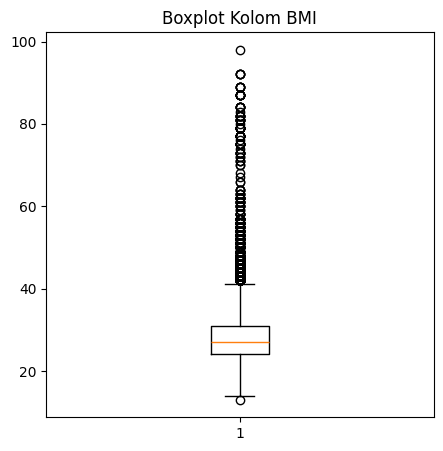

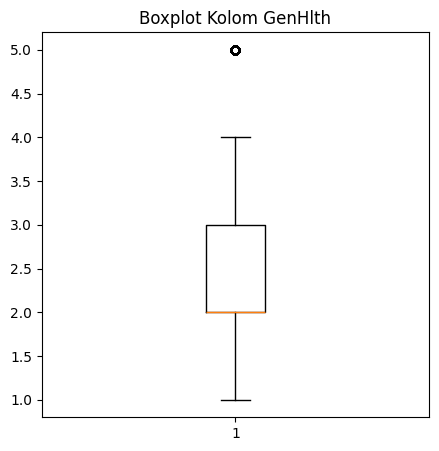

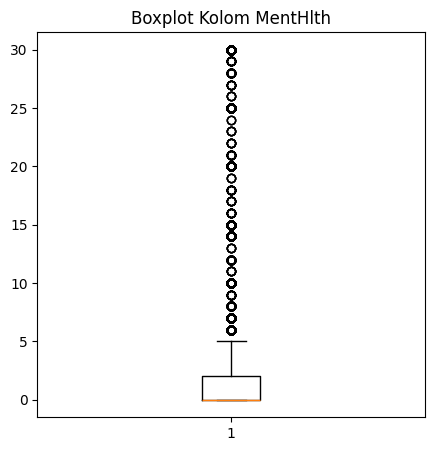

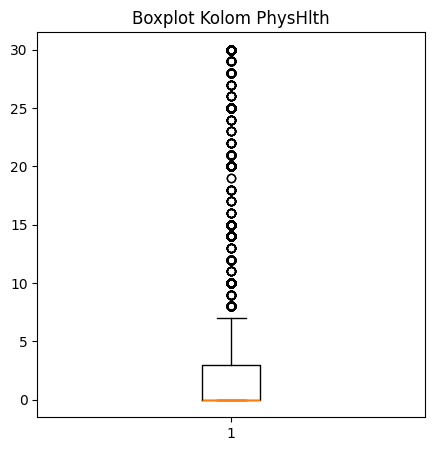

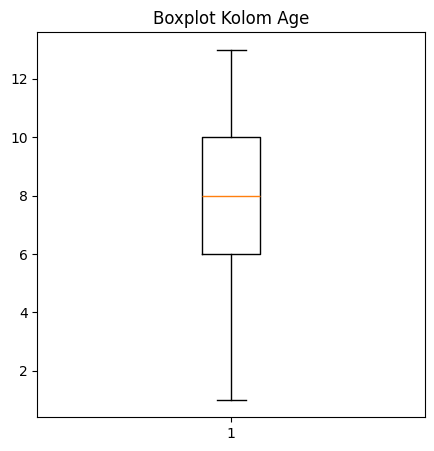

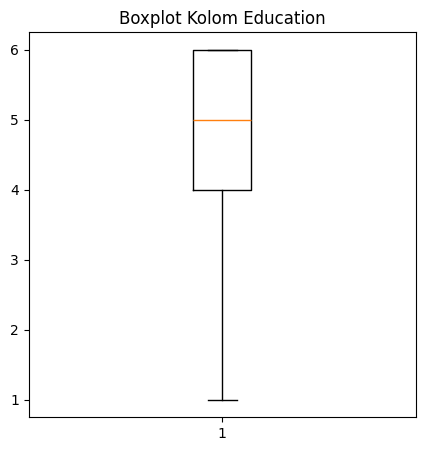

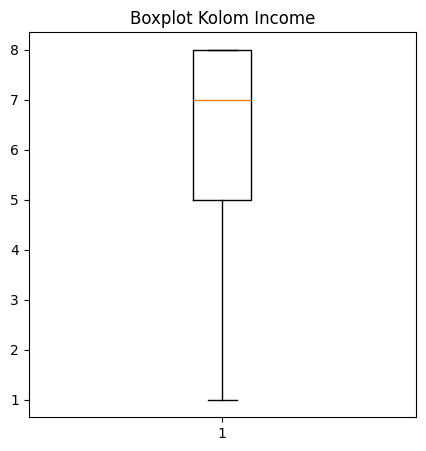

In [26]:
# Analisis Outlier Pada Kolom Numerik yang Bukan Binary
# Alasan mengapa hanya Kolom Numerik yang dipilih dan bukan binary yang diambil adalah karena binary tidak memiliki outlier
numerical_cols = df_train.select_dtypes(include=[np.number]).columns
non_binary_cols = [col for col in numerical_cols if len(df_train[col].unique()) > 2]

# Select Kolom Numerik yang Bukan Binary
df_train_outlier = df_train[non_binary_cols]

# Mencari jumlah outlier untuk setiap kolom
Q1 = df_train_outlier.quantile(0.25)
Q3 = df_train_outlier.quantile(0.75)
IQR = Q3 - Q1
outlier = ((df_train_outlier < (Q1 - 1.5 * IQR)) | (df_train_outlier > (Q3 + 1.5 * IQR))).sum()
print("Jumlah data outlier masing-masing kolom:")
print(outlier)
print()
print()

# Visualisasi data outlier dengan boxplot
print("Boxplot data outlier:")
for col in df_train_outlier.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df_train_outlier[col])
    plt.title("Boxplot Kolom " + col)
    plt.show()

#### Analisis Balance Of Data

In [27]:
# Analisis Balance Of Data pada Kolom Target
print("Balance data pada kolom target:")
print(df_train["Diabetes"].value_counts())

Balance data pada kolom target:
Diabetes
0    28031
1     4439
Name: count, dtype: int64


---

### Jawaban Nomor 3: Solusi Dari Permasalahan Nomor 2

Untuk solusi dari permasalahan yang ada pada nomor 2, beberapa langkah yang dapat dilakukan adalah sebagai berikut:
1. Untuk permasalahan terkait dengan Duplicate Value, dari hasil pengecekan terdapat 1135 data yang bernilai duplikat dengan total baris tabel yang duplikat pada data sebesar 1890 data. Permasalahan ini dapat terjadi karena ada kemungkinan bahwa pasien yang memiliki data kondisi kesehatan yang sama dengan pasien lainnya sehingga menyebabkan data yang ada mnejadi duplikat. Solusi yang dapat dilakukan untuk menangani duplikat data ini adalah dengan melakukan penambahan kolom keunikan untuk setiap pasien, misalkan atribut kolom ID sehingga untuk setiap pasien akan memiliki data sendiri yang unik dan tidak menimbulkan duplikat.

2. Untuk permasalahan terkait dengan Missing Value, pada pengecekan sudah tidak ditemukan adanya Missing Value untuk setiap kolom sehingga tidak perlu dilakukan penanganan.

3. Untuk permasalahan terkait dengan Outlier, setelah dilakukan visualisasi dengan Boxplot, ditemukan adanya 4 kolom dengan outlier yang cukup tinggi yaitu untuk kolom BMI (ada 1273 data), GenHlth (ada 1493 data), MentHlth (ada 4718 data), dan PhysHlth (ada 5205 data). Untuk penanganan yang dapat dilakukan agar isi data menjadi lebih baik yaitu dengan dua cara antara lain dengan menghapus data yang memiliki nilai Outlier (namun ini bisa menimbulkan adanya Missing Value) atau cara kedua yang lebih baik yaitu dengan mengganti nilai Outlier dengan nilai rata-rata, median, ataupun modus dari data. Namun, untuk kondisi data ini, jika outlier tidak dilakukan pengolahan juga tidak apa-apa mengingat data yang ada berasal dari kondisi sebenarnya pasien sehingga pada dasarnya tidak perlu dilakukan perubahan.

4. Untuk permasalahan terkait dengan Balance Data, data yang ada masih mengalami ketidakseimbangan yang mana pada kolom target, terdapat 28031 data yang bernilai False dan hanya 4439 data yang bernilai True sehingga solusi yang perlu dilakukan adalah dengan menangani data yang tidak seimbang (imbalance), dengan memanfaatkan oversampling dan undersampling.

---

### Jawaban Nomor 4: Teknik Encoding yang Digunakan

Pada proses pengerjaan praktikum ini, teknik encoding yang diterapkan adalah **Binary Encoding** sehingga kolom **Sex** dibagi menjadi dua kolom terpisah yaitu **Sex_F** dan **Sex_M**, dengan masing-masing kolom mewakili keberadaan jenis kelamin sebagai nilai numerik (0 atau 1). Dengan diterapkannya teknik ini, memungkinkan model untuk mengidentifikasi pengaruh jenis kelamin terhadap risiko diabetes tanpa adanya asumsi ordinal atau numerik yang tidak tepat antar kategori jenis kelamin. Sementara itu, atribut **Diabetes** yang tadinya bernilai FALSE/TRUE juga diubah menjadi 0/1, yang juga merupakan teknik **Binary Encoding**. Pendekatan tersebut memfasilitasi pemrosesan data lebih lanjut karena kebanyakan algoritma pembelajaran mesin memerlukan data dalam format numerik sehingga berbagai metode analisis dapat digunakan. Selain itu, mengubah value TRUE/FALSE menjadi 0/1 juga membuat data menjadi ringan karena yang awalnya bernilai 4-5 byte menjadi 1 byte.

---

### Jawaban Nomor 5: Desain Eksperimen

#### Tujuan Eksperimen
Tujuan eksperimen ini adalah untuk mengidentifikasi berbagai kombinasi fitur yang ada dalam data (informasi terkait keadaan fisik dan kebiasaan hidup dari pasien) dengan tujuan untuk mendapatkan model data paling signifikan dalam memprediksi benar tidaknya pasien mengidap penyakit diabetes.

#### Variabel Dependen dan Independen
Variabel Dependen: Diabetes
Variabel Independen: Semua fitur potensial yang tersedia (HighBp, GighChol, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex_F, Sex_M, Age, Education, dan Income).

#### Strategi Eksperimen
1. Preprocessing Data
2. Membandingkan dengan mencoba berbagai macam jenis model prediksi untuk mendapatkan model dengan akurasi tertinggi dalam memprediksi penyakit diabetes.

#### Skema Validasi
Data yang telah dipisah sebelumnya (df_train, df_val, dan df_test) digunakan untuk validasi menggunakan metode k-fold cross-validation untuk memastikan bahwa model tidak overfit dan akurat.